# Loading the dataset

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_2.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_7.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_5.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_10.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_1.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_8.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_3.JPG
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_6.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_9.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/I

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.models import save_model


In [17]:
data_train_path = "/kaggle/input/fruit-and-vegetable-image-recognition/train"
data_test_path = "/kaggle/input/fruit-and-vegetable-image-recognition/test"
data_val_path = "/kaggle/input/fruit-and-vegetable-image-recognition/validation"

# Resizing the images

In [18]:
img_width = 180
img_height = 180

In [19]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size = (img_width , img_height),
    batch_size = 32,
    validation_split =False
    )

Found 3115 files belonging to 36 classes.


In [20]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size = (img_width , img_height),
    batch_size = 32,
    validation_split =False
    )

Found 351 files belonging to 36 classes.


In [21]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size = (img_width , img_height),
    batch_size = 32,
    validation_split =False
    )

Found 359 files belonging to 36 classes.


In [22]:
data_class = data_train.class_names
print(len(data_class))

36


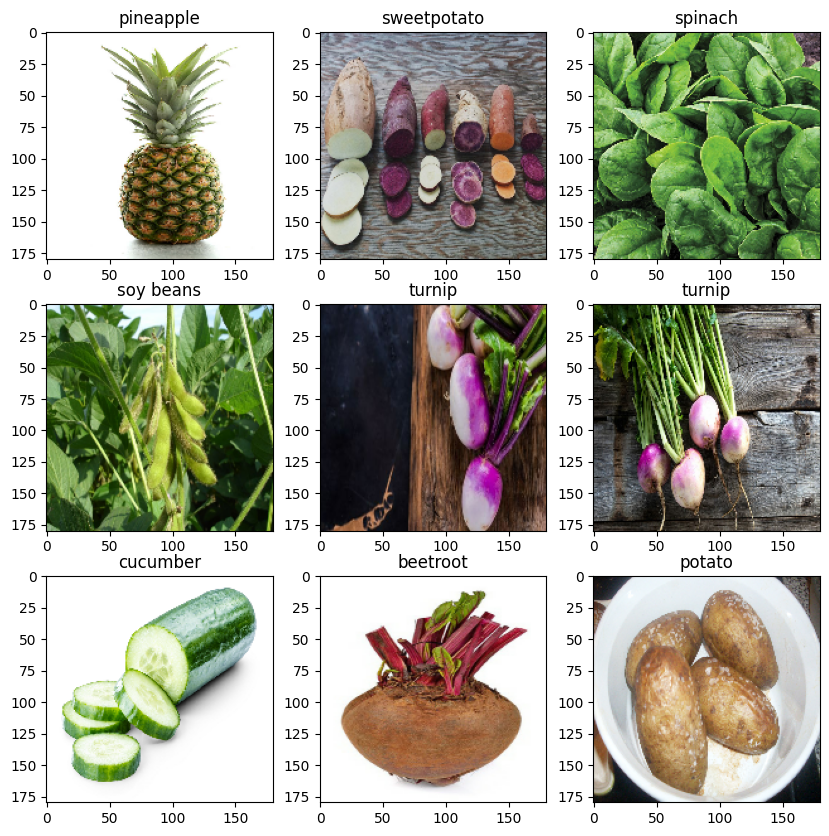

In [23]:
plt.figure(figsize=(10,10))
for image , labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_class[labels[i]])

# Training the model

In [30]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(128),
    layers.Dense(len(data_class))
])

In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam' , loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [35]:
history = model.fit(data_train, validation_data=data_val, epochs=20)

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 94s 954ms/step - accuracy: 0.0708 - loss: 3.4195 - val_accuracy: 0.3618 - val_loss: 2.3307
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 94s 951ms/step - accuracy: 0.2777 - loss: 2.5148 - val_accuracy: 0.5271 - val_loss: 1.6237
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 97s 981ms/step - accuracy: 0.3630 - loss: 2.1188 - val_accuracy: 0.5698 - val_loss: 1.3588
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 93s 943ms/step - accuracy: 0.4615 - loss: 1.8447 - val_accuracy: 0.6809 - val_loss: 1.1014
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 93s 945ms/step - accuracy: 0.5179 - loss: 1.6033 - val_accuracy: 0.7892 - val_loss: 0.8306
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 94s 951ms/step - accuracy: 0.5922 - loss: 1.3445 - val_accuracy: 0.8519 - val_loss: 0.5957
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 98s 989ms/step - accuracy: 0.6656 - loss: 1.1273 - val_accuracy: 0.8775 - val_loss: 0.5359
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 93s 942ms/step - accuracy: 0.7019 - loss: 0.9483 - val_accu

# Seeing accuracy by ROC-AUC plots

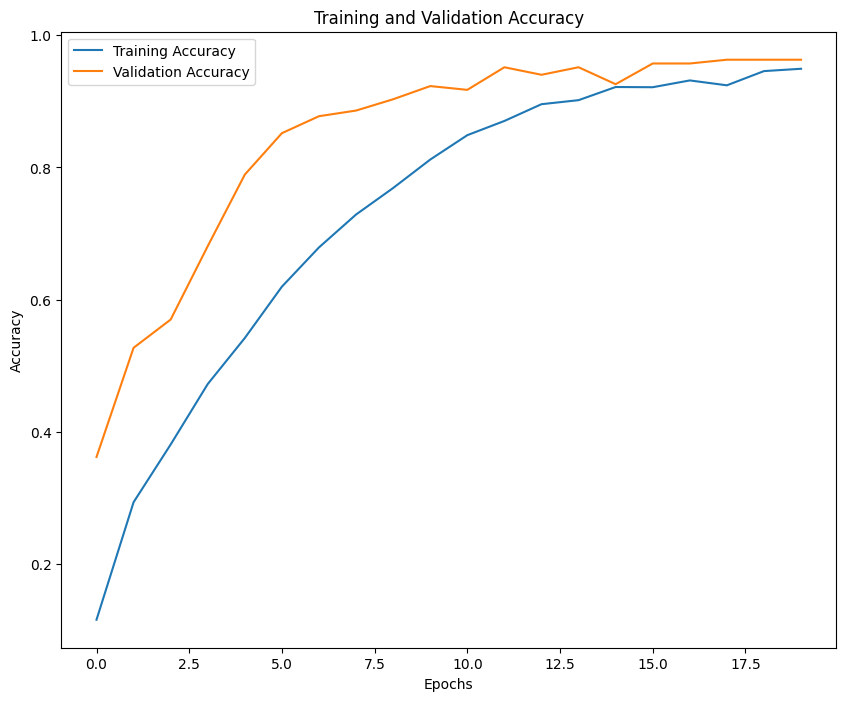

In [36]:
plt.figure(figsize=(10,8))
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

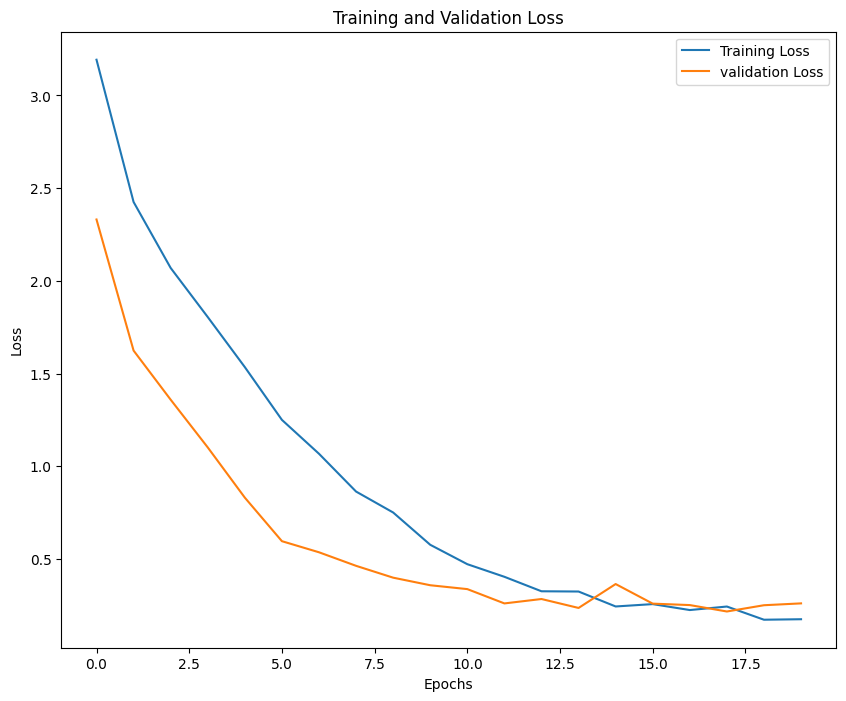

In [37]:
plt.figure(figsize=(10,8))
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Saving as .h5 for hosting

In [42]:
model.save("model.h5")